In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 07_12_2022 07_32_50.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

KeyboardInterrupt: 

In [ ]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [ ]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [ ]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [ ]:
filtro = dados[['Sem Epi Evolucao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro = filtro.loc[filtro['Evolucao']=='Óbito']
filtro

,Sem Epi Evolucao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
4,2021_22,COVID-19,Óbito,NaN,NaN,NaN,NaN
6,2022_06,COVID-19,Óbito,NaN,NaN,NaN,NaN
7,2021_12,COVID-19,Óbito,NaN,NaN,NaN,NaN
8,2021_13,COVID-19,Óbito,NaN,NaN,NaN,NaN
10,2021_13,COVID-19,Óbito,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
184427,2021_41,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
184428,2021_09,COVID-19,Óbito,Nao,NaN,NaN,NaN
184430,2021_28,COVID-19,Óbito,NaN,NaN,NaN,NaN
184431,2021_08,COVID-19,Óbito,Nao,NaN,NaN,NaN


In [ ]:
base = filtro.groupby('Sem Epi Evolucao').count()
base

,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Evolucao,,,,,,
2020_03,5,5,0,0,0,0
2020_04,6,6,0,0,0,0
2020_05,6,6,1,1,0,0
2020_06,4,4,0,0,0,0
2020_07,1,1,0,0,0,0
...,...,...,...,...,...,...
2022_42,24,24,3,0,0,0
2022_43,27,27,6,0,0,1
2022_44,25,25,6,0,0,2


In [ ]:
influ = filtro.loc[filtro['tp_flu_pcr']=='Influenza']
influ = influ.groupby('Sem Epi Evolucao').count()
influ = influ.reset_index()
influ = influ.merge(base, how='right', on='Sem Epi Evolucao')
influ = influ.fillna(0)
influ.head()

,Sem Epi Evolucao,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
1,2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2,2020_05,1.0,1.0,1.0,1.0,0.0,0.0,6,6,1,1,0,0
3,2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
4,2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0


In [ ]:
influ = influ['tp_flu_pcr_x']
influ

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
144    0.0
145    0.0
146    0.0
147    1.0
148    0.0
Name: tp_flu_pcr_x, Length: 149, dtype: float64

In [ ]:
vsr = filtro.loc[filtro['pcr_vsr']==1]
vsr = vsr.groupby('Sem Epi Evolucao').count()
vsr = vsr.reset_index()
vsr = vsr.merge(base, how='right', on='Sem Epi Evolucao')
vsr = vsr.fillna(0)
vsr

,Sem Epi Evolucao,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
1,2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2,2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
3,2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
4,2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2022_42,0.0,0.0,0.0,0.0,0.0,0.0,24,24,3,0,0,0
145,2022_43,1.0,1.0,1.0,0.0,0.0,1.0,27,27,6,0,0,1
146,2022_44,2.0,2.0,1.0,0.0,0.0,2.0,25,25,6,0,0,2
147,2022_45,0.0,0.0,0.0,0.0,0.0,0.0,12,12,2,1,1,0


In [ ]:
vsr = vsr['pcr_vsr_x']
vsr

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
144    0.0
145    1.0
146    2.0
147    0.0
148    0.0
Name: pcr_vsr_x, Length: 149, dtype: float64

In [ ]:
semana = base.reset_index()
semana = semana['Sem Epi Evolucao']
semana

0      2020_03
1      2020_04
2      2020_05
3      2020_06
4      2020_07
        ...   
144    2022_42
145    2022_43
146    2022_44
147    2022_45
148    2022_46
Name: Sem Epi Evolucao, Length: 149, dtype: object

In [ ]:
legenda = pd.DataFrame(columns=['VSR','Influenza'])

In [ ]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

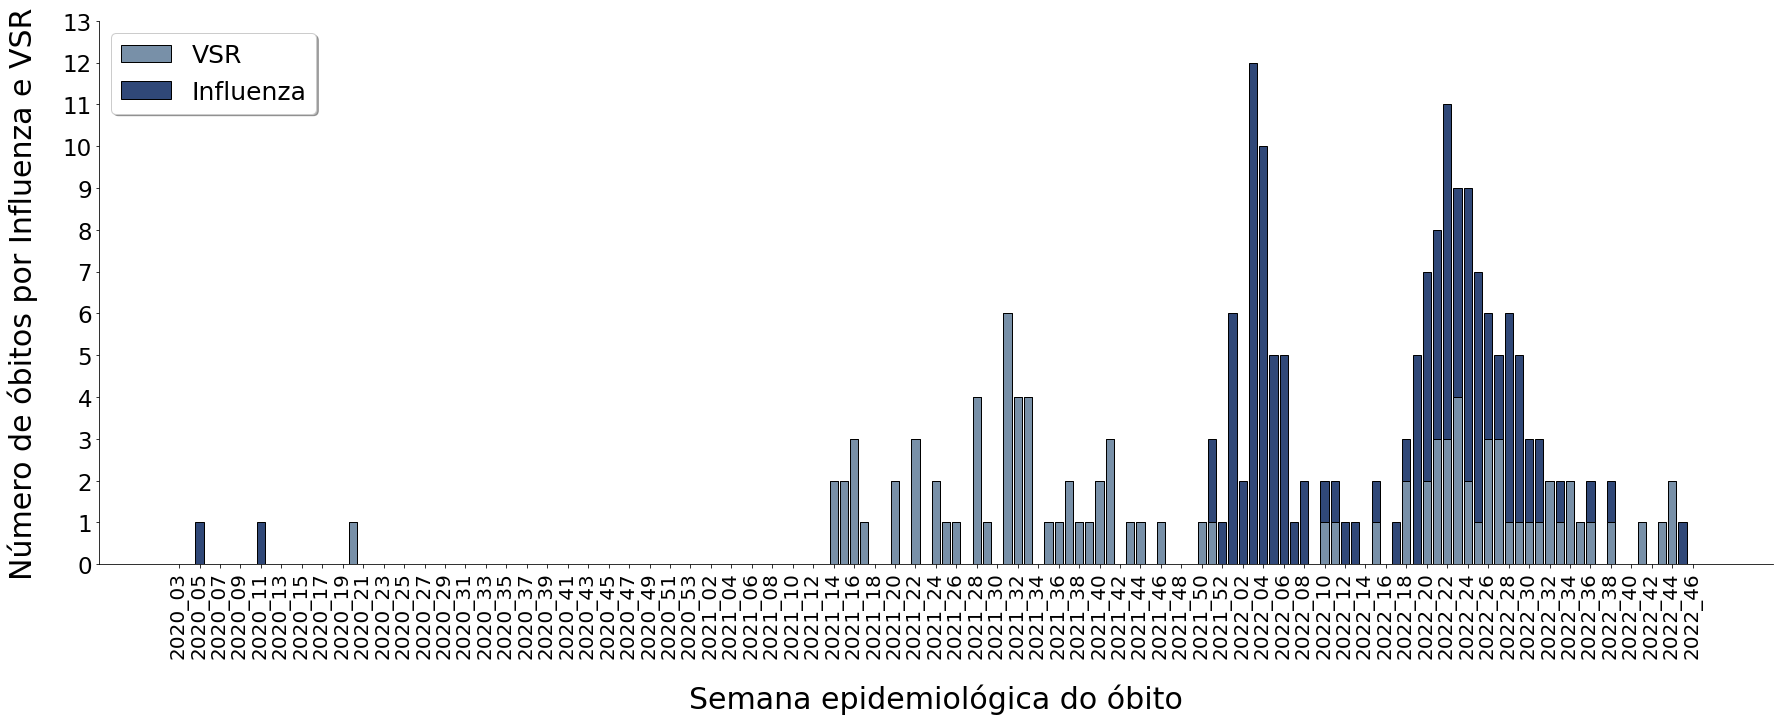

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(semana,vsr,color='#7890a8',edgecolor='#000000')
plt.bar(semana,influ, bottom = np.array(vsr), color = '#304878',edgecolor='#000000')
sns.despine()
plt.xticks(np.arange(0,np.size(semana),2),rotation=90,fontsize=20)
plt.yticks(np.arange(0,14,1),fontsize=23)
plt.xlabel('Semana epidemiológica do óbito',labelpad=25,fontsize=30)
plt.ylabel('Número de óbitos por Influenza e VSR',labelpad=25,fontsize=30)
plt.legend(legenda,fontsize=25,shadow=True,loc='upper left')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/numeroObito_InfluVSR.png',dpi=300,bbox_inches='tight')